In [11]:
from keras.datasets import mnist
from autoencoder import *
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
ae = Autoencoder(x_train, reshape = True, optimizer = 'SGD')

In [7]:
ae.train(epochs=10, batch_size=32)

Epoch 1/10
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0285
Epoch 2/10
60000/60000 [==============================] - 305s 5ms/step - loss: 0.0196
Epoch 3/10
60000/60000 [==============================] - 300s 5ms/step - loss: 0.0158
Epoch 4/10
60000/60000 [==============================] - 295s 5ms/step - loss: 0.0137
Epoch 5/10
60000/60000 [==============================] - 287s 5ms/step - loss: 0.0123
Epoch 6/10
60000/60000 [==============================] - 287s 5ms/step - loss: 0.0113
Epoch 7/10
60000/60000 [==============================] - 294s 5ms/step - loss: 0.0105
Epoch 8/10
60000/60000 [==============================] - 288s 5ms/step - loss: 0.0099
Epoch 9/10
60000/60000 [==============================] - 289s 5ms/step - loss: 0.0094
Epoch 10/10
60000/60000 [==============================] - 296s 5ms/step - loss: 0.0090


In [8]:
ae.model.save_weights('./autoencoder_weights.h5')

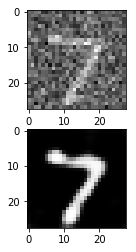

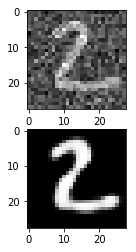

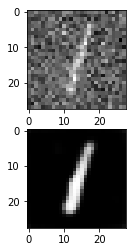

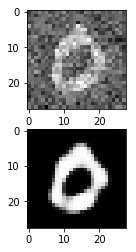

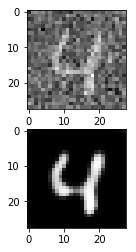

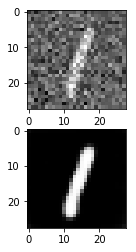

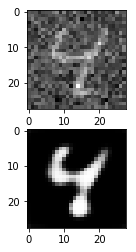

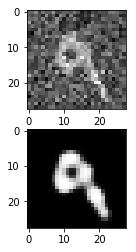

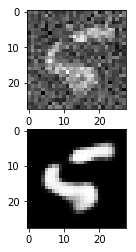

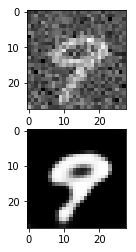

In [12]:
ae = Autoencoder(x_test, reshape = True, optimizer = 'SGD')
model = ae.get_model()
model.load_weights('./autoencoder_weights.h5')
x_test_noisy = ae.X + 0.3*np.random.standard_normal(size = ae.X.shape)
x_test_denoised = model.predict(x_test_noisy)
for i in range(10) :
    plt.subplot(211)
    x_test_noisy = x_test_noisy.reshape(x_test_noisy.shape[0], x_test_noisy.shape[1], x_test_noisy.shape[2])
    x_test_denoised = x_test_denoised.reshape(x_test_denoised.shape[0], x_test_denoised.shape[1], x_test_denoised.shape[2])
    plt.imshow(x_test_noisy[i, :, :], cmap='gray')
    plt.subplot(212)
    plt.imshow(x_test_denoised[i, :, :], cmap='gray')
    plt.show()